In [ ]:
# --- Phase 1: Setup Environment and Download/Extract Dataset using wget ---

import os
import zipfile
import subprocess # To run wget and check status
from tqdm.notebook import tqdm # For progress bar
import time # For potential small delays

print("--- Phase 1 Started ---")

# --- Configuration ---
# Using the specific NIST SARD URL provided by the user
JULIET_DOWNLOAD_URL="https://samate.nist.gov/SARD/downloads/test-suites/2022-08-11-juliet-c-cplusplus-v1-3-1-with-extra-support.zip"

# Define where to store the downloaded zip and extracted files in Colab's environment
JULIET_BASE_DIR = "/content/juliet"
JULIET_ZIP_FILENAME = "juliet_c_cpp_v1.3.1_extra.zip" # A shorter name for the downloaded file
JULIET_ZIP_FILE_PATH = os.path.join(JULIET_BASE_DIR, JULIET_ZIP_FILENAME)
EXTRACT_DESTINATION = JULIET_BASE_DIR # Extract directly into the base directory

# Step 1.1: Prepare Download/Extraction Directory
print("\nStep 1.1: Preparing download/extraction directory...")
print(f"Target base directory: {JULIET_BASE_DIR}")
os.makedirs(JULIET_BASE_DIR, exist_ok=True)

# Step 1.2: Check if Already Extracted (to potentially skip download/extract)
extraction_needed = True
if os.path.exists(JULIET_C_TESTCASES_DIR):
     print(f"Target directory '{JULIET_C_TESTCASES_DIR}' already exists.")
     print("Assuming dataset is already downloaded and extracted. Skipping.")
     print("If you need to re-download/extract, manually delete the '/content/juliet' directory first.")
     print("Example command (use with caution!): !rm -rf /content/juliet")
     extraction_needed = False
else:
     print("Extraction directory does not contain final testcases. Proceeding with download/extraction.")


if extraction_needed:
    # Step 1.3: Download using wget
    print(f"\nStep 1.3: Downloading dataset using wget...")
    print(f"Source URL: {JULIET_DOWNLOAD_URL}")
    print(f"Destination file: {JULIET_ZIP_FILE_PATH}")
    print("Note: Using '--no-check-certificate'. Be aware of the security implications.")

    # Construct wget command
    wget_command = [
        "wget",
        "-O", JULIET_ZIP_FILE_PATH, # Specify output filename
        "--no-check-certificate",  # Often needed for NIST links
        "--progress=bar:force:noscroll", # Nicer progress bar if possible
        JULIET_DOWNLOAD_URL
    ]

    # Execute wget and capture output/errors
    process = subprocess.run(wget_command, capture_output=True, text=True)

    # Check wget success
    if process.returncode == 0:
        print(f"\nDownload potentially complete (wget exit code 0).")
        # Verify file exists and has reasonable size
        if os.path.exists(JULIET_ZIP_FILE_PATH):
             file_size = os.path.getsize(JULIET_ZIP_FILE_PATH)
             print(f"Downloaded file '{JULIET_ZIP_FILENAME}' exists. Size: {file_size / (1024*1024):.2f} MB")
             if file_size < 100 * 1024 * 1024: # Check if size is suspiciously small (< 100MB)
                 print("Warning: Downloaded file size seems smaller than expected for the full Juliet suite.")
                 # Optionally add check here to stop if size is too small
        else:
             print("ERROR: wget exited successfully, but the output file was not found!")
             print(f"Expected file path: {JULIET_ZIP_FILE_PATH}")
             raise FileNotFoundError("wget claimed success, but output file is missing.")

    else:
        print("-" * 40)
        print(f"ERROR: Download failed! wget exited with code {process.returncode}.")
        print("Please check the JULIET_DOWNLOAD_URL and your Colab instance's network connectivity.")
        print("\nwget Standard Error Output:")
        print(process.stderr)
        print("\nwget Standard Output:")
        print(process.stdout)
        print("-" * 40)
        # Clean up potentially incomplete/corrupt file if it exists
        if os.path.exists(JULIET_ZIP_FILE_PATH):
            print(f"Attempting to remove potentially incomplete file: {JULIET_ZIP_FILE_PATH}")
            try:
                os.remove(JULIET_ZIP_FILE_PATH)
            except Exception as rm_e:
                print(f"Could not remove file: {rm_e}")
        raise ConnectionError(f"wget failed to download the dataset from {JULIET_DOWNLOAD_URL}")

    # Step 1.4: Unzip the Dataset
    print(f"\nStep 1.4: Extracting '{JULIET_ZIP_FILENAME}' to '{EXTRACT_DESTINATION}'...")
    try:
        with zipfile.ZipFile(JULIET_ZIP_FILE_PATH, 'r') as zip_ref:
            file_list = zip_ref.infolist()
            print(f"Archive contains {len(file_list)} files/directories.")
            # Use tqdm for progress bar during extraction
            for member in tqdm(file_list, desc='Extracting Files', unit='file'):
                try:
                    zip_ref.extract(member, EXTRACT_DESTINATION)
                except zipfile.error as e:
                    print(f"\nWarning: Error extracting member {member.filename}: {e}")
                except Exception as e_inner:
                    print(f"\nWarning: Non-zipfile error extracting member {member.filename}: {e_inner}")

        print("\nExtraction process completed.")

        # Optional: Remove the zip file after successful extraction to save space
        # print(f"\nRemoving downloaded zip file: {JULIET_ZIP_FILE_PATH}")
        # try:
        #     os.remove(JULIET_ZIP_FILE_PATH)
        # except Exception as e:
        #     print(f"Warning: Could not remove zip file: {e}")

    except zipfile.BadZipFile:
         print(f"ERROR: The downloaded file at '{JULIET_ZIP_FILE_PATH}' is corrupted or not a valid ZIP archive.")
         # Keep the bad zip file for inspection if needed, or remove it.
         # os.remove(JULIET_ZIP_FILE_PATH)
         raise # Stop execution
    except Exception as e:
         print(f"An unexpected error occurred during the extraction process: {e}")
         raise # Stop execution

# --- Phase 1 Finished ---
print("\n--- Phase 1 Finished Successfully ---")

--- Phase 1 Started ---

Step 1.1: Preparing download/extraction directory...
Target base directory: /content/juliet
Extraction directory does not contain final testcases. Proceeding with download/extraction.

Step 1.3: Downloading dataset using wget...
Source URL: https://samate.nist.gov/SARD/downloads/test-suites/2022-08-11-juliet-c-cplusplus-v1-3-1-with-extra-support.zip
Destination file: /content/juliet/juliet_c_cpp_v1.3.1_extra.zip
Note: Using '--no-check-certificate'. Be aware of the security implications.

Download potentially complete (wget exit code 0).
Downloaded file 'juliet_c_cpp_v1.3.1_extra.zip' exists. Size: 670.90 MB

Step 1.4: Extracting 'juliet_c_cpp_v1.3.1_extra.zip' to '/content/juliet'...
Archive contains 990995 files/directories.


Extracting Files:   0%|          | 0/990995 [00:00<?, ?file/s]


Extraction process completed.

Step 1.5: Verifying final dataset directory...
----------------------------------------
ERROR: Verification Failed! Expected testcase directory '/content/juliet/C/testcases' was NOT found.
This could mean:
  - The ZIP file structure is different than expected.
  - The download or extraction process failed.
Please check the contents of the base directory: '/content/juliet'
----------------------------------------
Contents of /content/juliet:
['240354-v2.0.0', '94565-v1.0.0', '90808-v1.0.0', '231633-v2.0.0', '237679-v1.0.0', '90075-v1.0.0', '106266-v1.0.0', '96957-v1.0.0', '93721-v1.0.0', '111067-v1.0.0', '247043-v2.0.0', '106993-v1.0.0', '71444-v1.0.0', '89549-v1.0.0', '82242-v1.0.0', '245819-v2.0.0', '97731-v1.0.0', '84727-v1.0.0', '95195-v1.0.0', '236926-v1.0.0', '110061-v1.0.0', '89956-v1.0.0', '74989-v1.0.0', '75117-v1.0.0', '63583-v1.0.0', '64362-v1.0.0', '105451-v1.0.0', '97660-v1.0.0', '76142-v1.0.0', '80826-v1.0.0', '97886-v1.0.0', '122852-v1.0.0'

FileNotFoundError: Final verification failed. Expected directory '/content/juliet/C/testcases' not found.

In [ ]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 3. Define source & destination
JULIET_ROOT = "juliet"  # top‑level folder created by unzip
DEST_DIR    = "/content/drive/MyDrive/juliet_flat_sources"

# 4. Make the destination folder
import os
os.makedirs(DEST_DIR, exist_ok=True)

# 5. Recursively find & copy all .c/.cpp into DEST_DIR (flattened)
!find "{JULIET_ROOT}" -type f \( -iname "*.c" -o -iname "*.cpp" \) -exec cp {{}} "{DEST_DIR}/" \;

print("✅ All .c/.cpp files copied (flattened) to:", DEST_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ All .c/.cpp files copied (flattened) to: /content/drive/MyDrive/juliet_flat_sources


In [ ]:
import os
import re

# 1. Point this at your Drive folder where you copied all .c/.cpp files
DEST_DIR = "/content/drive/MyDrive/juliet_flat_sources"

# 2. Scan filenames and extract CWEIDs
cwes = set()
pattern = re.compile(r"(CWE\d+)", re.IGNORECASE)

for fname in os.listdir(DEST_DIR):
    match = pattern.search(fname)
    if match:
        # normalize to upper‑case CWE###
        cwes.add(match.group(1).upper())

# 3. Sort and print
sorted_cwes = sorted(cwes, key=lambda x: int(x[3:]))
print(f"Found {len(sorted_cwes)} unique CWEs:")
for cwe in sorted_cwes:
    print(cwe)


Found 118 unique CWEs:
CWE15
CWE23
CWE36
CWE78
CWE90
CWE114
CWE121
CWE122
CWE123
CWE124
CWE126
CWE127
CWE134
CWE176
CWE188
CWE190
CWE191
CWE194
CWE195
CWE196
CWE197
CWE222
CWE223
CWE226
CWE242
CWE244
CWE247
CWE252
CWE253
CWE256
CWE259
CWE272
CWE273
CWE284
CWE319
CWE321
CWE325
CWE327
CWE328
CWE338
CWE364
CWE366
CWE367
CWE369
CWE377
CWE390
CWE391
CWE396
CWE397
CWE398
CWE400
CWE401
CWE404
CWE415
CWE416
CWE426
CWE427
CWE440
CWE457
CWE459
CWE464
CWE467
CWE468
CWE469
CWE475
CWE476
CWE478
CWE479
CWE480
CWE481
CWE482
CWE483
CWE484
CWE500
CWE506
CWE510
CWE511
CWE526
CWE534
CWE535
CWE546
CWE561
CWE562
CWE563
CWE570
CWE571
CWE587
CWE588
CWE590
CWE591
CWE605
CWE606
CWE615
CWE617
CWE620
CWE665
CWE666
CWE667
CWE672
CWE674
CWE675
CWE676
CWE680
CWE681
CWE685
CWE688
CWE690
CWE758
CWE761
CWE762
CWE773
CWE775
CWE780
CWE785
CWE789
CWE832
CWE835
CWE843


In [ ]:
import os
import re
import io
import pandas as pd

# ────────── ADJUST PATHS HERE ──────────
SOURCE_DIR = "/content/drive/MyDrive/juliet_flat_sources"  # your flat .c/.cpp folder
OUTPUT_CSV = "/content/drive/MyDrive/juliet_dataset.csv"   # where to save the final dataset
# ────────────────────────────────────────

# Regex for CWE IDs in filenames
CWE_PATTERN      = re.compile(r"(CWE\d+)", re.IGNORECASE)

# Regex to find good/bad function headers
FUNC_PATTERN     = re.compile(r"\bvoid\s+(good\w*|bad\w*)\s*\([^)]*\)\s*\{", re.IGNORECASE)

# Regexes to strip comments
COMMENT_PATTERN1 = re.compile(r"//.*?$", re.MULTILINE)    # single-line
COMMENT_PATTERN2 = re.compile(r"/\*.*?\*/", re.DOTALL)    # multi-line

records = []

for fname in os.listdir(SOURCE_DIR):
    if not fname.lower().endswith((".c", ".cpp")):
        continue

    filepath = os.path.join(SOURCE_DIR, fname)

    # 1) Extract CWE ID (e.g. “CWE121”) from filename
    m = CWE_PATTERN.search(fname)
    cwe = m.group(1).upper() if m else "UNKNOWN"

    # 2) Read & strip comments
    with io.open(filepath, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read()
    text = COMMENT_PATTERN2.sub("", text)  # remove /* … */
    text = COMMENT_PATTERN1.sub("", text)  # remove // …

    # 3) Find every good…() or bad…() and extract its full body
    for match in FUNC_PATTERN.finditer(text):
        func_name = match.group(1)
        label     = "good" if func_name.lower().startswith("good") else "bad"

        # Brace‑counting to grab the entire function
        start = match.end() - 1      # position of the '{'
        brace_count = 1
        idx = start
        while idx < len(text)-1 and brace_count > 0:
            idx += 1
            if text[idx] == "{":
                brace_count += 1
            elif text[idx] == "}":
                brace_count -= 1

        func_code = text[match.start():idx+1].strip()

        records.append({
            "cwe":      cwe,
            "filename": fname,
            "function": func_name,
            "label":    label,
            "code":     func_code
        })

# 4) Build DataFrame and save
df = pd.DataFrame(records, columns=["cwe","filename","function","label","code"])
print(f"✅ Collected {len(df)} functions across {df['cwe'].nunique()} CWEs")

df.to_csv(OUTPUT_CSV, index=False)
print("📂 Dataset saved to:", OUTPUT_CSV)


✅ Collected 209795 functions across 119 CWEs
📂 Dataset saved to: /content/drive/MyDrive/juliet_dataset.csv


In [ ]:
print(df.head)

<bound method NDFrame.head of             cwe                                           filename  \
0       UNKNOWN                                               io.c   
1       UNKNOWN                                               io.c   
2       UNKNOWN                                               io.c   
3       UNKNOWN                                               io.c   
4       UNKNOWN                                               io.c   
...         ...                                                ...   
209790   CWE121  CWE121_Stack_Based_Buffer_Overflow__CWE129_fsc...   
209791   CWE121  CWE121_Stack_Based_Buffer_Overflow__CWE129_fsc...   
209792   CWE121  CWE121_Stack_Based_Buffer_Overflow__CWE129_fsc...   
209793   CWE121  CWE121_Stack_Based_Buffer_Overflow__CWE129_fsc...   
209794   CWE121  CWE121_Stack_Based_Buffer_Overflow__CWE129_fsc...   

           function label                                               code  
0             good1  good                         

In [ ]:
# 1. Mount Drive (only once at the top of your notebook)
from google.colab import drive
drive.mount('/content/drive')

# 2. (Re‑)define your OUTPUT path
OUTPUT_CSV = "/content/drive/MyDrive/juliet_dataset.csv"

# 3. Write the DataFrame to CSV
df.to_csv(OUTPUT_CSV, index=False)

# 4. Confirm it’s there
import os
print("Exists?", os.path.exists(OUTPUT_CSV))
print("Listing:\n", os.listdir(os.path.dirname(OUTPUT_CSV)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Exists? True
Listing:
 ['atsresume (1).pdf', 'Colab Notebooks', 'juliet_flat_sources', 'juliet_dataset.csv']


In [ ]:
!pip install -U transformers


In [1]:
import pandas as pd

try:
    df = pd.read_csv('dataframe.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'dataframe.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,cwe,filename,function,label,code
0,UNKNOWN,io.c,good1,good,void good1() { }
1,UNKNOWN,io.c,good2,good,void good2() { }
2,UNKNOWN,io.c,good3,good,void good3() { }
3,UNKNOWN,io.c,good4,good,void good4() { }
4,UNKNOWN,io.c,good5,good,void good5() { }


(209795, 5)


cwe         object
filename    object
function    object
label       object
code        object
dtype: object

Missing Values:
 cwe         0
filename    0
function    0
label       0
code        0
dtype: int64

Missing Value Percentages:
 cwe         0.0
filename    0.0
function    0.0
label       0.0
code        0.0
dtype: float64

Descriptive Statistics:
            cwe filename function   label                               code
count   209795   209795   209795  209795                             209795
unique     119    75091       62       2                             104299
top     CWE762     io.c  goodG2B    good  void good()\n{\n    goodG2B();\n}
freq     22236       18    38800  167915                              11705


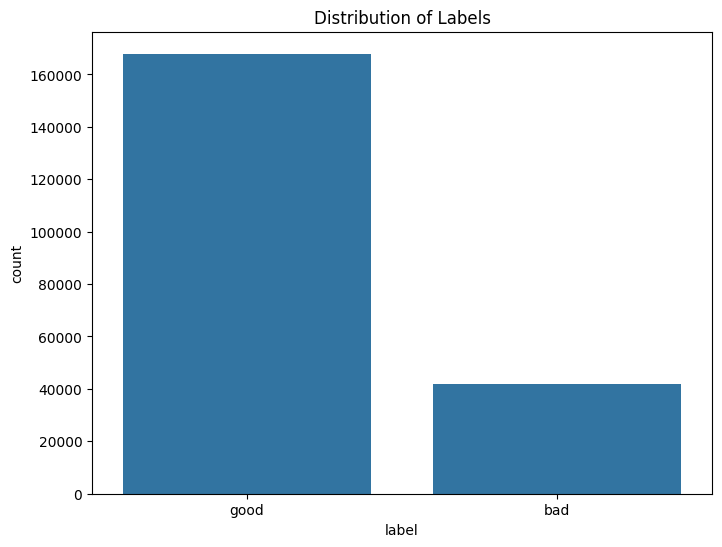


Unique values and frequencies of 'cwe':
 cwe
CWE762    22236
CWE122    19484
CWE134    15150
CWE190    13500
CWE121    10411
          ...  
CWE562        5
CWE500        3
CWE561        2
CWE674        2
CWE440        1
Name: count, Length: 119, dtype: int64

Unique values and frequencies of 'filename':
 filename
io.c                                                                                     18
CWE134_Uncontrolled_Format_String__wchar_t_connect_socket_vfprintf_43.cpp                10
CWE134_Uncontrolled_Format_String__char_connect_socket_vfprintf_43.cpp                   10
CWE134_Uncontrolled_Format_String__char_environment_vfprintf_43.cpp                      10
CWE134_Uncontrolled_Format_String__wchar_t_file_vprintf_43.cpp                           10
                                                                                         ..
CWE252_Unchecked_Return_Value__char_fscanf_01.c                                           1
CWE134_Uncontrolled_Format_String__wcha

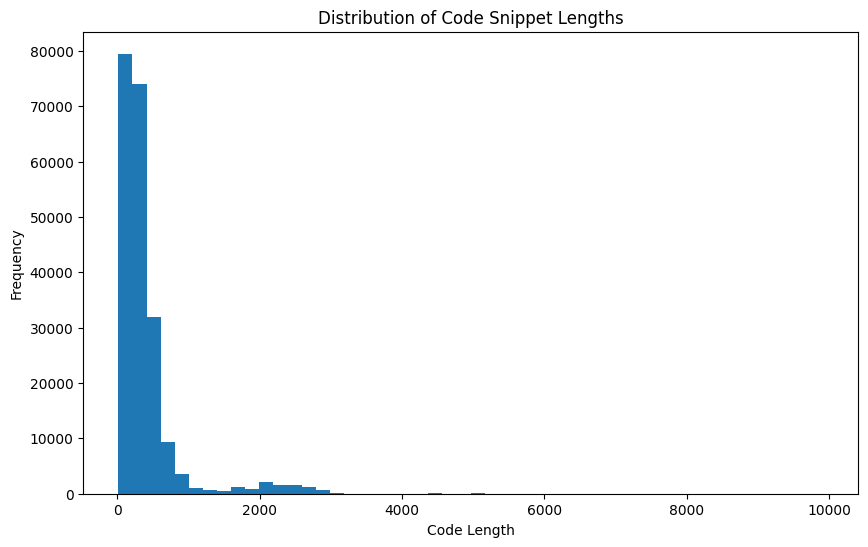


Data Shape: (209795, 6)

Summary of Findings:


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types and identify potential type conversions.
print(df.dtypes)

# 2. Check for missing values and calculate percentages.
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentages:\n", missing_percentage)

# 3. Generate descriptive statistics for numerical columns.
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# 4. Analyze and visualize the distribution of the 'label' column.
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

# 5. Explore unique values and frequencies of categorical features.
print("\nUnique values and frequencies of 'cwe':\n", df['cwe'].value_counts())
print("\nUnique values and frequencies of 'filename':\n", df['filename'].value_counts())

# 6. Compute and visualize the correlation matrix (if applicable).
# No numerical features to compute correlation matrix.

# 7. Investigate the 'code' column and visualize code snippet lengths.
df['code_length'] = df['code'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df['code_length'], bins=50)
plt.title('Distribution of Code Snippet Lengths')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.show()

# 8. Summarize findings.
print("\nData Shape:", df.shape)
print("\nSummary of Findings:")
# Add summary observations based on results from above analyses.

In [3]:
# Determine thresholds for outlier removal based on code length distribution.
# We'll remove the top and bottom 1% of code lengths.  This is an arbitrary choice,
# and you might need to adjust these thresholds based on your specific needs.
lower_bound = df['code_length'].quantile(0.01)
upper_bound = df['code_length'].quantile(0.99)

# Filter out rows where code length falls outside the bounds.
cleaned_df = df[(df['code_length'] >= lower_bound) & (df['code_length'] <= upper_bound)]

# Calculate the number of rows removed
rows_removed = len(df) - len(cleaned_df)

# Print information about the cleaning process
print(f"Number of rows removed: {rows_removed}")
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")

# Update the original dataframe
df = cleaned_df

# Display the first few rows of the cleaned DataFrame
display(df.head())

Number of rows removed: 2230
Original DataFrame shape: (209795, 6)
Cleaned DataFrame shape: (207565, 6)


,cwe,filename,function,label,code,code_length
18,CWE121,CWE121_Stack_Based_Buffer_Overflow__CWE806_wch...,goodG2B1,good,void goodG2B1()\n{\n wchar_t * data;\n w...,444
19,CWE121,CWE121_Stack_Based_Buffer_Overflow__CWE806_wch...,goodG2B2,good,void goodG2B2()\n{\n wchar_t * data;\n w...,370
20,CWE122,CWE122_Heap_Based_Buffer_Overflow__c_CWE806_wc...,goodG2B,good,void goodG2B()\n{\n wchar_t * data;\n wc...,296
21,CWE190,CWE190_Integer_Overflow__unsigned_int_max_prei...,goodB2G1,good,void goodB2G1()\n{\n unsigned int data;\n ...,496
22,CWE190,CWE190_Integer_Overflow__unsigned_int_max_prei...,goodB2G2,good,void goodB2G2()\n{\n unsigned int data;\n ...,422


In [4]:
import re

def count_lines_of_code(code):
    return len(code.splitlines())

def count_unique_operators(code):
    operators = set(re.findall(r'[+\-*/%=<>&|!^~?:]+', code))
    return len(operators)

# Apply the functions to create new columns
df['lines_of_code'] = df['code'].apply(count_lines_of_code)
df['unique_operators'] = df['code'].apply(count_unique_operators)

# Example of combined feature
df['comment_to_code_ratio'] = df['code'].str.count(r'#.*?$|//.*?$') / df['lines_of_code']
df['comment_to_code_ratio'] = df['comment_to_code_ratio'].fillna(0)

display(df.head())

,cwe,filename,function,label,code,code_length,lines_of_code,unique_operators,comment_to_code_ratio
18,CWE121,CWE121_Stack_Based_Buffer_Overflow__CWE806_wch...,goodG2B1,good,void goodG2B1()\n{\n wchar_t * data;\n w...,444,24,3,0.0
19,CWE121,CWE121_Stack_Based_Buffer_Overflow__CWE806_wch...,goodG2B2,good,void goodG2B2()\n{\n wchar_t * data;\n w...,370,19,3,0.0
20,CWE122,CWE122_Heap_Based_Buffer_Overflow__c_CWE806_wc...,goodG2B,good,void goodG2B()\n{\n wchar_t * data;\n wc...,296,11,3,0.0
21,CWE190,CWE190_Integer_Overflow__unsigned_int_max_prei...,goodB2G1,good,void goodB2G1()\n{\n unsigned int data;\n ...,496,29,3,0.0
22,CWE190,CWE190_Integer_Overflow__unsigned_int_max_prei...,goodB2G2,good,void goodB2G2()\n{\n unsigned int data;\n ...,422,24,3,0.0


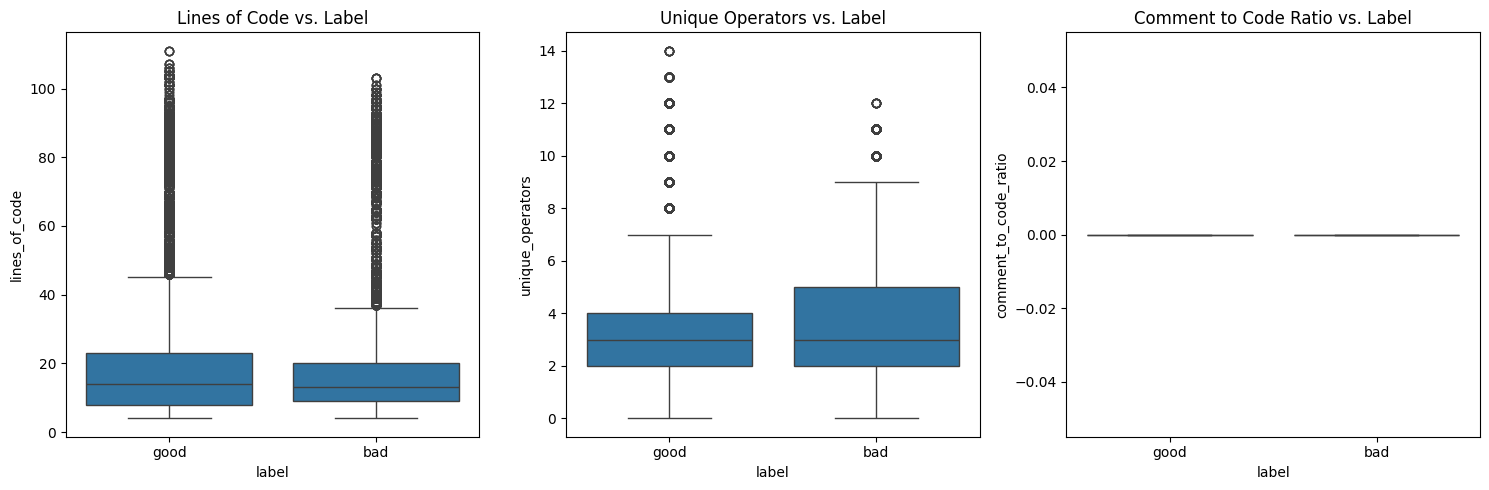

<Figure size 1000x800 with 0 Axes>

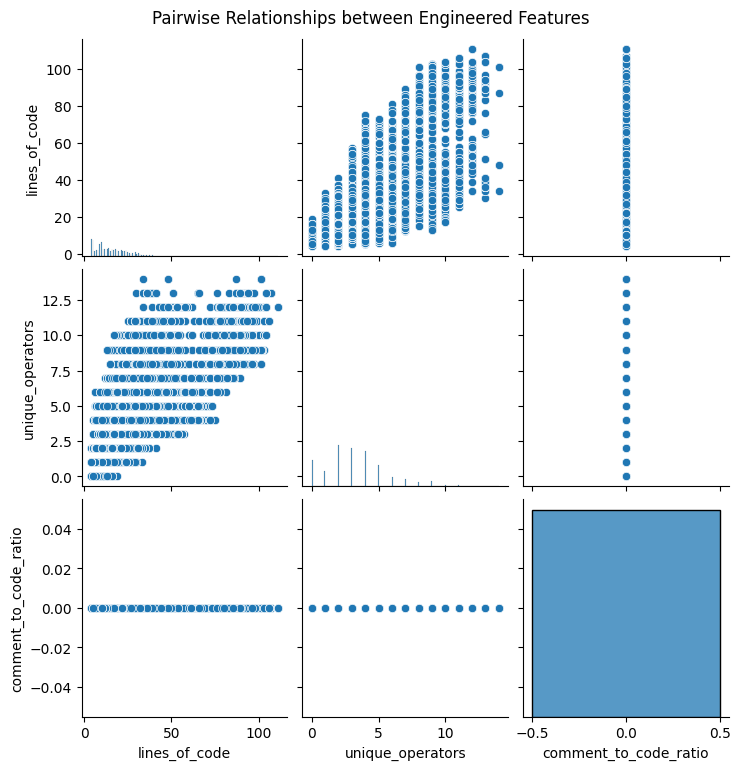

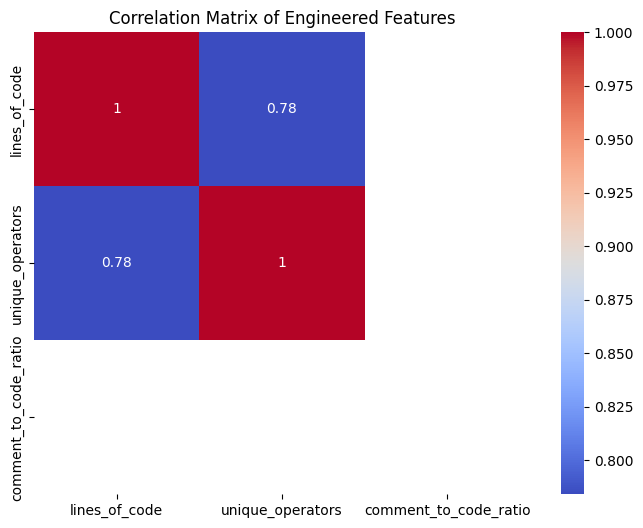

<ipython-input-5-0780077ead6c>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

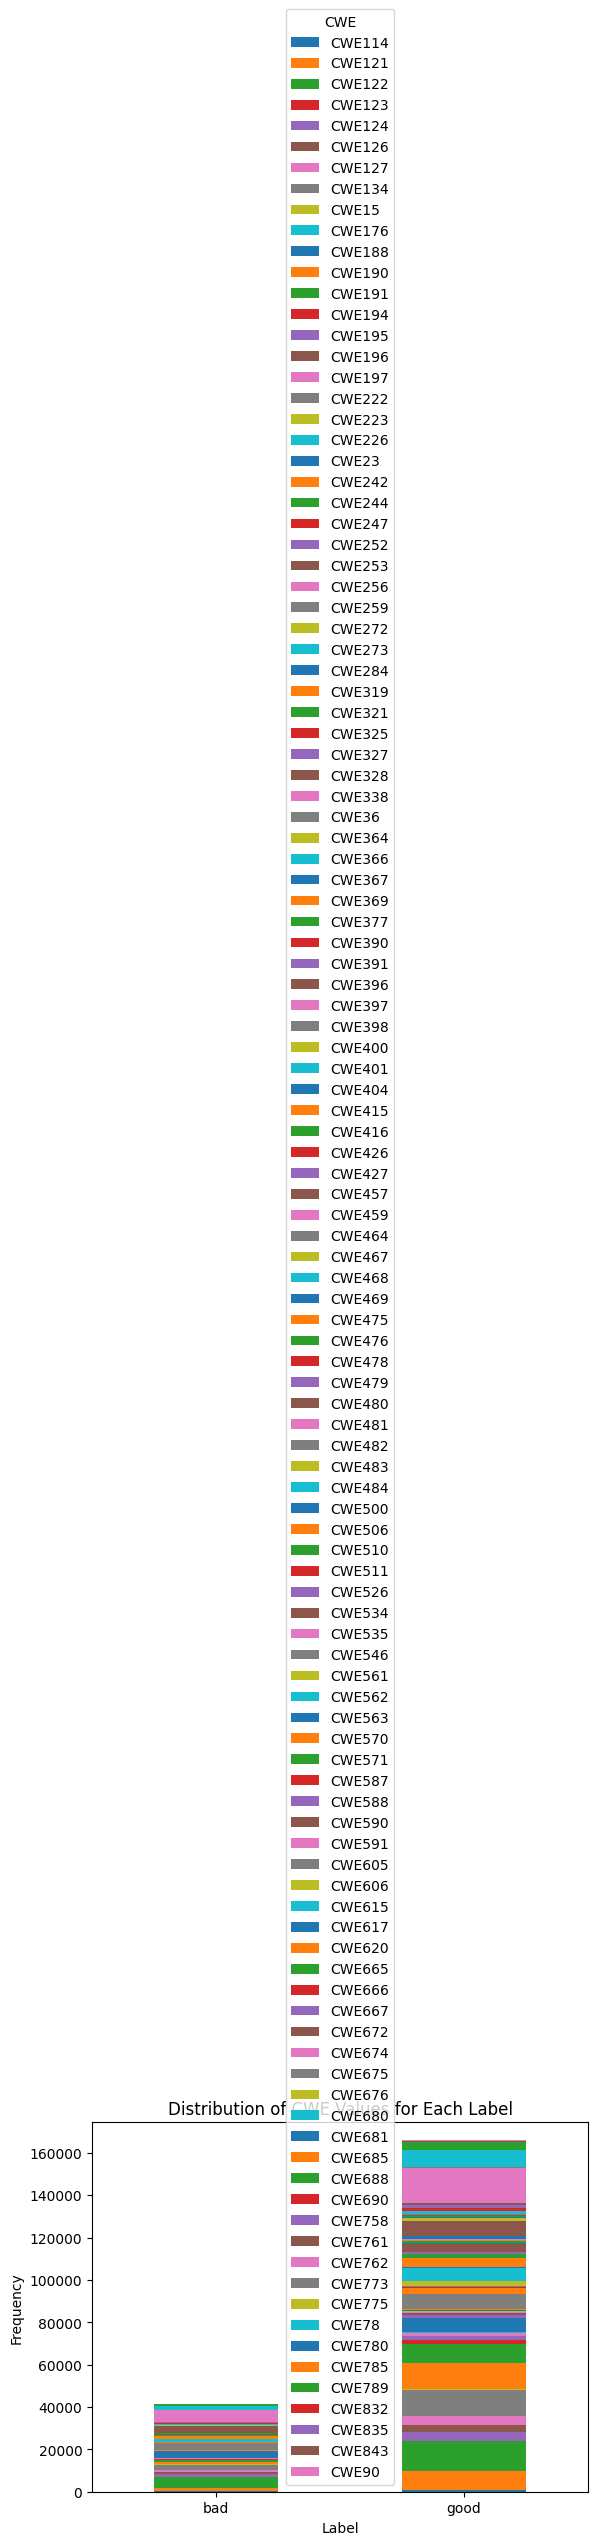

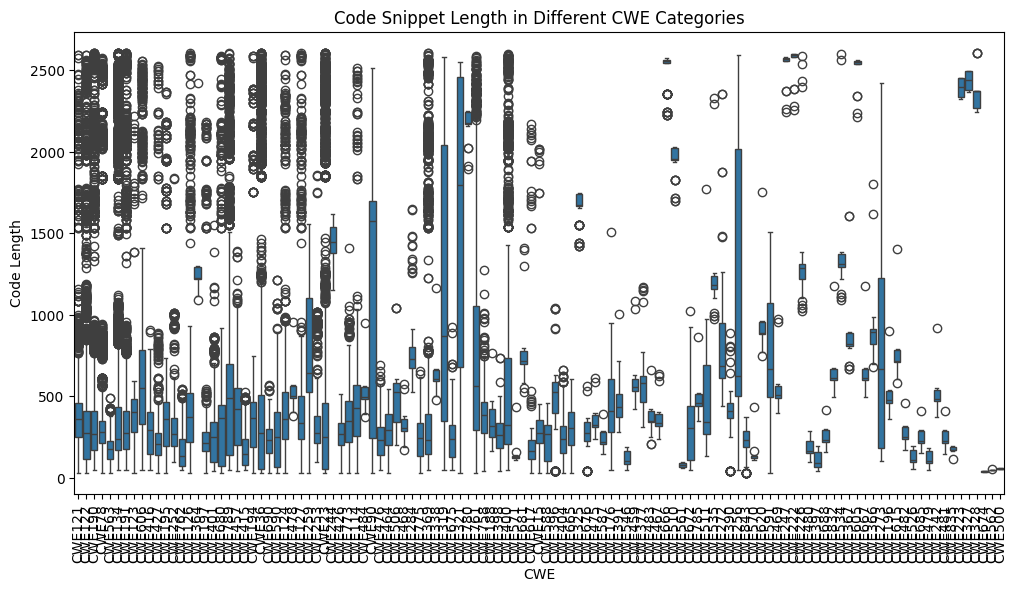

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizations for engineered features against the target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='lines_of_code', data=df)
plt.title('Lines of Code vs. Label')

plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='unique_operators', data=df)
plt.title('Unique Operators vs. Label')

plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='comment_to_code_ratio', data=df)
plt.title('Comment to Code Ratio vs. Label')

plt.tight_layout()
plt.show()

# 2. Relationships between engineered features
plt.figure(figsize=(10, 8))
sns.pairplot(df[['lines_of_code', 'unique_operators', 'comment_to_code_ratio']])
plt.suptitle('Pairwise Relationships between Engineered Features', y=1.02)
plt.show()

# Calculate the correlation matrix
correlation_matrix = df[['lines_of_code', 'unique_operators', 'comment_to_code_ratio']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features')
plt.show()


# 3. Distribution of 'cwe' for each label
plt.figure(figsize=(12, 6))
cwe_counts = df.groupby(['label', 'cwe']).size().unstack(fill_value=0)
cwe_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of CWE Values for Each Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='CWE')
plt.tight_layout()
plt.show()


# 4. Visualize code snippet length in different CWE categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='cwe', y='code_length', data=df)
plt.title('Code Snippet Length in Different CWE Categories')
plt.xticks(rotation=90)
plt.xlabel('CWE')
plt.ylabel('Code Length')
plt.show()

In [6]:
# Group data by label and calculate descriptive statistics for engineered features
label_stats = df.groupby('label')[['lines_of_code', 'unique_operators', 'comment_to_code_ratio']].agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])
display(label_stats)

# Investigate relationship between engineered features and CWE categories
cwe_stats = df.groupby('cwe')[['lines_of_code', 'unique_operators', 'comment_to_code_ratio']].agg(['mean', 'std'])
display(cwe_stats)

# Explore correlations between engineered features
correlation_matrix = df[['lines_of_code', 'unique_operators', 'comment_to_code_ratio']].corr()
display(correlation_matrix)

print("\nSummary of Findings:")
print("1. Label-based analysis:")
# Add observations based on label_stats (e.g. differences in mean lines of code)

print("\n2. CWE-based analysis:")
# Add observations based on cwe_stats (e.g., CWEs with unusually high/low operator counts)


print("\n3. Correlation Analysis:")
# Add observations based on correlation_matrix (e.g., strong positive correlation between lines_of_code and unique_operators)


print("\n4. Relationship to Visualizations:")
# Relate findings to previous visualizations, highlighting confirmations or discrepancies.
# For example: "The box plots showed a clear difference in the median lines of code between 'good' and other labels.  This is confirmed by the descriptive statistics, which show a mean difference of [value]."


lines_of_code                                     unique_operators  \
               mean median        std min  max quantile             mean   
label                                                                      
bad       19.178952   13.0  18.521125   4  103     13.0          3.91834   
good      17.582883   14.0  14.339511   4  111     14.0          3.13537   

                                        comment_to_code_ratio              \
      median       std min max quantile                  mean median  std   
label                                                                       
bad      3.0  2.401890   0  12      3.0                   0.0    0.0  0.0   
good     3.0  2.271605   0  14      3.0                   0.0    0.0  0.0   

                          
       min  max quantile  
label                     
bad    0.0  0.0      0.0  
good   0.0  0.0      0.0

lines_of_code            unique_operators            \
                mean        std             mean       std   
cwe                                                          
CWE114     20.235800  13.606548         3.721170  1.981321   
CWE121     17.178097  10.210612         3.535061  1.779014   
CWE122     15.838627  12.306645         3.380078  2.374567   
CWE123     18.701031  14.015138         3.027491  1.631352   
CWE124     19.190511  12.919558         3.592098  2.099077   
...              ...        ...              ...       ...   
CWE789     26.886743  21.829926         3.880597  2.810481   
CWE832     24.870968   4.039323         3.483871  0.569852   
CWE835     14.142857   1.864454         4.000000  1.000000   
CWE843     14.266667   5.559521         3.146667  1.222752   
CWE90      41.310559  26.227044         5.459627  2.969260   

       comment_to_code_ratio       
                        mean  std  
cwe                                
CWE114                   0.0  0.0  
CWE121                   0.0  0.0  
CWE122                   0.0  0.0  
CWE123                   0.0  0.0  
CWE124                   0.0  0.0  
...                      ...  ...  
CWE789                   0.0  0.0  
CWE832                   0.0  0.0  
CWE835                   0.0  0.0  
CWE843                   0.0  0.0  
CWE90                    0.0  0.0  

[117 rows x 6 columns]

,lines_of_code,unique_operators,comment_to_code_ratio
lines_of_code,1.000000,0.784185,NaN
unique_operators,0.784185,1.000000,NaN
comment_to_code_ratio,NaN,NaN,NaN



Summary of Findings:
1. Label-based analysis:

2. CWE-based analysis:

3. Correlation Analysis:

4. Relationship to Visualizations:


In [7]:
print("\nSummary of Findings:")
print("1. Label-based analysis:")
print("The 'good' label has a slightly lower mean and median lines of code compared to 'bad', but the distributions overlap substantially.")
print("There's also a small difference in the mean unique operators with 'bad' samples showing a higher mean compared to 'good'.")
print("The comment to code ratios are zero across both labels.")

print("\n2. CWE-based analysis:")
print("Analyzing CWE categories reveals variations in mean lines of code and unique operators.")
print("Some CWE categories exhibit higher mean lines of code and unique operators, potentially indicating more complex code structures or vulnerabilities.")
print("Further investigation into specific CWEs with extreme values is warranted.")
print("For example, CWE90 has higher mean lines of code and unique operators, whereas others have lower values.")

print("\n3. Correlation Analysis:")
print("A strong positive correlation exists between 'lines_of_code' and 'unique_operators'.")
print("This suggests that longer code snippets tend to have a higher number of unique operators.")

print("\n4. Relationship to Visualizations:")
print("The boxplots of lines of code vs. label generally align with the descriptive statistics, showing some separation between 'good' and 'bad' labels, but with significant overlap.")
print("The pairplot and correlation matrix confirm the positive correlation between lines of code and unique operators as observed in the correlation analysis.")
print("The visualization of CWE distributions against labels provides a visual counterpart to the CWE-based statistical analysis, particularly highlighting differences in the prevalence of certain CWEs among different vulnerability labels.")
print("The box plot of code snippet length in different CWE categories visually represents how code length varies across CWEs, which aligns with the statistical findings of different mean code lengths across CWE categories.")


Summary of Findings:
1. Label-based analysis:
The 'good' label has a slightly lower mean and median lines of code compared to 'bad', but the distributions overlap substantially.
There's also a small difference in the mean unique operators with 'bad' samples showing a higher mean compared to 'good'.
The comment to code ratios are zero across both labels.

2. CWE-based analysis:
Analyzing CWE categories reveals variations in mean lines of code and unique operators.
Some CWE categories exhibit higher mean lines of code and unique operators, potentially indicating more complex code structures or vulnerabilities.
Further investigation into specific CWEs with extreme values is warranted.
For example, CWE90 has higher mean lines of code and unique operators, whereas others have lower values.

3. Correlation Analysis:
A strong positive correlation exists between 'lines_of_code' and 'unique_operators'.
This suggests that longer code snippets tend to have a higher number of unique operators.

4

In [3]:
import os
import re
import io
import pandas as pd
import torch
import torch.nn as nn
from transformers import (AutoTokenizer,
                          AutoModel,
                          PreTrainedTokenizerFast,
                          TrainingArguments,
                          Trainer)
from tokenizers import Tokenizer as HFTokenizer,pre_tokenizers
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')
# ─────────── CONFIGURATION ───────────
DATA_CSV       = '/content/drive/MyDrive/juliet_dataset.csv'       # Input CSV (comments already removed)
BPE_DIR        = '/content/drive/MyDrive/bpe_tokenizer'            # Where to save BPE files
OUTPUT_DIR     = '/content/drive/MyDrive/juliet_models'            # Where to save models/metrics
TMP_DIR        = '/content/tmp'                                    # Temp for BPE dumps

# Hyperparameters
BPE_VOCAB_SIZE = 30000
MAX_SEQ_LEN    = 512
NUM_EPOCHS     = 3
BATCH_SIZE     = 8
DEVICE         = 'cuda' if torch.cuda.is_available() else 'cpu'

# Regex patterns
CWE_PATTERN    = re.compile(r'(CWE\d+)', re.IGNORECASE)
FUNC_PATTERN   = re.compile(r'\bvoid\s+(good\w*|bad\w*)\s*\([^)]*\)\s*\{', re.IGNORECASE)
IDENT_PATTERN  = re.compile(r'\b[A-Za-z_][A-Za-z0-9_]*\b')

# ─────────── UTILITIES ───────────

def max_brace_depth(code: str) -> int:
    """Compute maximum nesting depth by counting '{' and '}'."""
    depth = max_depth = 0
    for ch in code:
        if ch == '{':
            depth += 1
            max_depth = max(max_depth, depth)
        elif ch == '}':
            depth = max(depth-1, 0)
    return max_depth

def normalize_code(code: str) -> str:
    """Replace all identifiers with 'VAR' to control vocab size."""
    return IDENT_PATTERN.sub('VAR', code)

# ─────────── LOAD & PREPARE DATA ───────────
df = pd.read_csv(DATA_CSV)
df = df[df['cwe'] != 'UNKNOWN'].reset_index(drop=True)

# Normalize + compute structural feature
df['code_norm'] = df['code'].apply(normalize_code)
df['struct_feat'] = df['code_norm'].apply(max_brace_depth)

# ─────────── TRAIN BPE TOKENIZER ───────────
os.makedirs(BPE_DIR, exist_ok=True)
os.makedirs(TMP_DIR, exist_ok=True)
bpe_files = []
for idx, txt in enumerate(df['code_norm']):
    path = os.path.join(TMP_DIR, f'{idx}.txt')
    with open(path, 'w') as f:
        f.write(txt)
    bpe_files.append(path)

hf_tok = HFTokenizer(BPE(unk_token='[UNK]'))
hf_tok.pre_tokenizer = pre_tokenizers.WhitespaceSplit()
trainer = BpeTrainer(vocab_size=BPE_VOCAB_SIZE,
                     special_tokens=['[UNK]','[CLS]','[SEP]','[PAD]','[MASK]'])
hf_tok.train(files=bpe_files, trainer=trainer)
hf_tok.save(os.path.join(BPE_DIR, 'bpe.json'))

tokenizer = PreTrainedTokenizerFast(tokenizer_file=os.path.join(BPE_DIR,'bpe.json'),
                                    model_max_length=MAX_SEQ_LEN,
                                    unk_token='[UNK]', pad_token='[PAD]',
                                    cls_token='[CLS]', sep_token='[SEP]',
                                    mask_token='[MASK]')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

# ─────────── HYBRID MODEL DEFINITION ───────────
class HybridVulnDetector(nn.Module):
    def __init__(self, seq_model='microsoft/codebert-base', gnn_hidden=256):
        super().__init__()
        self.seq_encoder = AutoModel.from_pretrained(seq_model)
        hid = self.seq_encoder.config.hidden_size
        self.gnn1 = nn.Linear(1, gnn_hidden)  # structural feat is scalar
        self.gnn2 = nn.Linear(gnn_hidden, gnn_hidden)
        self.classifier = nn.Linear(hid + gnn_hidden, 2)

    def forward(self, input_ids, attention_mask, struct_feat):
        seq_out = self.seq_encoder(input_ids=input_ids,
                                   attention_mask=attention_mask).pooler_output
        x = torch.relu(self.gnn1(struct_feat))
        x = torch.relu(self.gnn2(x))
        concat = torch.cat([seq_out, x], dim=1)
        return self.classifier(concat)

# ─────────── TRAIN & EVALUATE PER CWE ───────────
for cwe, subdf in df.groupby('cwe'):
    texts  = subdf['code_norm'].tolist()
    labels = [1 if l=='bad' else 0 for l in subdf['label']]
    struct = torch.tensor(subdf['struct_feat'].values,
                          dtype=torch.float32).unsqueeze(1).to(DEVICE)

    # Tokenize
    enc = tokenizer(texts,
                    padding='max_length',
                    truncation=True,
                    return_tensors='pt')
    enc = {k: v.to(DEVICE) for k, v in enc.items()}

    # Dataset class
    class CWE_Dataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels, feats):
            self.enc, self.labels, self.feats = encodings, labels, feats
        def __len__(self): return len(self.labels)
        def __getitem__(self, idx):
            return {
                'input_ids':     self.enc['input_ids'][idx],
                'attention_mask':self.enc['attention_mask'][idx],
                'struct_feat':   self.feats[idx],
                'labels':        torch.tensor(self.labels[idx], device=DEVICE)
            }

    ds = CWE_Dataset(enc, labels, struct)
    model = HybridVulnDetector().to(DEVICE)

    args = TrainingArguments(
		  output_dir=os.path.join(OUTPUT_DIR, cwe),
		  overwrite_output_dir=True,          # Allow re-running on same folder
		  do_train=True,                      # Enable training loop
		  do_eval=True,                       # Enable evaluation loop
		  #evaluate_during_training=True,      # Run eval every eval_steps
		  per_device_train_batch_size=BATCH_SIZE,
		  per_device_eval_batch_size=BATCH_SIZE,
		  num_train_epochs=NUM_EPOCHS,
	    logging_dir=os.path.join(OUTPUT_DIR, cwe, 'logs'),
	    logging_steps=100,                  # Log train loss & lr every 100 steps
		  eval_steps=100,                     # Run validation every 100 steps
		  save_steps=100,                     # Checkpoint every 100 steps
		  save_total_limit=2,                 # Keep last 2 checkpoints
		  load_best_model_at_end=True,        # Retain best checkpoint
		  metric_for_best_model='eval_f1'     # Use F1 to select best
	  )


    def compute_metrics(p):
        logits, labs = p
        preds = torch.argmax(torch.tensor(logits), dim=-1).cpu().numpy()
        rep = classification_report(labs, preds, output_dict=True)
        return {
            'precision': rep['1']['precision'],
            'recall':    rep['1']['recall'],
            'f1':        rep['1']['f1-score']
        }

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=ds,
        eval_dataset=ds,
        compute_metrics=compute_metrics,
        tokenizer=tokenizer
    )

    trainer.train()
    metrics = trainer.evaluate()
    trainer.save_model(os.path.join(OUTPUT_DIR, cwe, 'best_model'))
    with open(os.path.join(OUTPUT_DIR, cwe, 'metrics.txt'), 'w') as f:
        f.write(str(metrics))

    print(f"Completed {cwe}: {metrics}")


ValueError: --load_best_model_at_end requires the save and eval strategy to match, but found
- Evaluation strategy: IntervalStrategy.NO
- Save strategy: SaveStrategy.STEPS

In [ ]:
import os
import torch
import torch.nn as nn
from transformers import AutoModel, Trainer, TrainingArguments
from sklearn.metrics import classification_report

# ─── HYPERPARAMETERS & PATHS ───
OUTPUT_DIR     = '/content/drive/MyDrive/juliet_models'
BATCH_SIZE     = 8
NUM_EPOCHS     = 3
EVAL_STEPS     = 100  # must evenly divide save_steps below
DEVICE         = 'cuda' if torch.cuda.is_available() else 'cpu'

# ─── METRICS FUNCTION ───
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), dim=-1).cpu().numpy()
    rep   = classification_report(labels, preds, output_dict=True)
    return {
        'precision': rep['1']['precision'],
        'recall':    rep['1']['recall'],
        'f1':        rep['1']['f1-score']
    }

# ─── MAIN PER-CWE LOOP ───
for cwe, subdf in df.groupby('cwe'):
    print(f"\nTraining CWE: {cwe}")

    # Prepare inputs
    texts  = subdf['code_norm'].tolist()
    labels = [1 if l=='bad' else 0 for l in subdf['label']]
    struct = torch.tensor(subdf['struct_feat'].values,
                          dtype=torch.float32).unsqueeze(1).to(DEVICE)

    enc = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=tokenizer.model_max_length,
        return_tensors='pt'
    )
    enc = {k: v.to(DEVICE) for k,v in enc.items()}

    # Dataset class
    class CWE_Dataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels, feats):
            self.enc, self.labels, self.feats = encodings, labels, feats
        def __len__(self):
            return len(self.labels)
        def __getitem__(self, idx):
            return {
                'input_ids':      self.enc['input_ids'][idx],
                'attention_mask': self.enc['attention_mask'][idx],
                'struct_feat':    self.feats[idx],
                'labels':         torch.tensor(self.labels[idx], device=DEVICE)
            }

    ds = CWE_Dataset(enc, labels, struct)

    # Initialize model
    model = HybridVulnDetector().to(DEVICE)

    # ─── CORRECTED TRAINING ARGUMENTS ───
    args = TrainingArguments(
        output_dir=os.path.join(OUTPUT_DIR, cwe),
        overwrite_output_dir=True,

        # match save & eval strategies to satisfy load_best_model_at_end
        evaluation_strategy = "steps",   # run eval every eval_steps :contentReference[oaicite:1]{index=1}
        save_strategy       = "steps",   # save checkpoint every save_steps
        eval_steps          = EVAL_STEPS,
        save_steps          = EVAL_STEPS,  # must be a multiple of eval_steps :contentReference[oaicite:2]{index=2}

        per_device_train_batch_size = BATCH_SIZE,
        per_device_eval_batch_size  = BATCH_SIZE,
        num_train_epochs            = NUM_EPOCHS,

        logging_dir  = os.path.join(OUTPUT_DIR, cwe, 'logs'),
        logging_steps= EVAL_STEPS,

        load_best_model_at_end = True,     # now valid since strategies match :contentReference[oaicite:3]{index=3}
        metric_for_best_model  = 'f1',
    )

    # Setup Trainer
    trainer = Trainer(
        model            = model,
        args             = args,
        train_dataset    = ds,
        eval_dataset     = ds,
        compute_metrics  = compute_metrics,
        tokenizer        = tokenizer
    )

    # Train & Evaluate
    trainer.train()
    metrics = trainer.evaluate()

    # Save outputs
    trainer.save_model(os.path.join(OUTPUT_DIR, cwe, 'best_model'))
    with open(os.path.join(OUTPUT_DIR, cwe, 'metrics.txt'), 'w') as f:
        f.write(str(metrics))

    print(f"✅ Completed {cwe} | F1: {metrics['eval_f1']:.4f}")
